# World Data League 2021: Model of integrated transports for senior citizens
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable??


## Introduction

##### **WDL Challenge Description**
To understand the senior citizens' mobility patterns and their characteristics: We aim to provide better conditions of mobility for our senior citizens, giving them the same opportunities to arrive at their points of interest with affordable and accessible public transport.

##### **WDL desired Outcome**
A general model to design an integrated transportationservice for the senior population,or, an integrated transportation service for seniorpopulation proposal for one city.

##### **Methods**
The two datasets we merged using the LinkID columns. All LinkID were kept as the private roads, not present in the bus traffic data, are also required to identify travel needs in the senior population. 
We explored the dataset using Pandas Profiling and the visualization using Seaborn.

Repository: https://github.com/Mega-Barrel/WDL_Hackathon

## Development
This notebook was run on Google Colaboratory.

### Initialize

In [ ]:
# Load libraries
from google.colab import drive # to load data from google drive
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
import csv # to import data in txt files

In [ ]:
# Mount the drive folder
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set up color blind friendly color palette
# The palette with grey:
cbPalette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
# The palette with black:
cbbPalette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# sns.palplot(sns.color_palette(cbPalette))
# sns.palplot(sns.color_palette(cbbPalette))

sns.set_palette(cbPalette)
#sns.set_palette(cbbPalette)

In [ ]:
# Seaborn favourite plot shortcuts
def boxplot(data, x, y, title = ""):
    
    """
    This function generates a seaborn boxplot with my defaults parameters.

    Parameters:
        title (string) title of the plot, default is empty
        data (df) the data frame
        x (panda serie) the x axis
        y (panda serie) the y axis
    """

    f, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(x=x, y=y, data=data, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
    plt.title(title)
    plt.ioff()

def countplot(data, variable, title = ""):
    """
    This function contains my favourite parameters for the seaborn coutplot plot
    """

    f, ax = plt.subplots(figsize=(8, 6))
    sns.countplot(data=data, x=variable)
    plt.title(title)
    plt.ioff()

### Load and merge the data

In [ ]:
PATH = "/content/drive/MyDrive/Data_science/WDL"
bus_routes_data = PATH + "/" + "Model_of_integrated_transports_for_senior_citizens/Data/Bus_Routes"
traffic_data = PATH + "/" + "Model_of_integrated_transports_for_senior_citizens/Data/Traffic_Intensity_Model"

In [ ]:
# Load Route Data
file = bus_routes_data + "/" + "BusRoutes.txt"
routes = pd.read_csv(file, sep = '|', encoding = 'UTF-8')

# Load traffic data
file = traffic_data + "/" + "Senior_TIM_v1.txt"
traffic = pd.read_csv(file, sep="|", encoding = "latin1")

# Join the datasets
df = pd.merge(routes, traffic, on = 'linkid', how='outer')

### Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184603 entries, 0 to 184602
Data columns (total 6 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   IDRoute                                    84505 non-null   float64
 1   linkid                                     184603 non-null  int64  
 2   Region_of_Origin                           160279 non-null  object 
 3   District_of_Origin                         160279 non-null  object 
 4   County_of_Origin                           160279 non-null  object 
 5   Average_Daily_SeniorPopulation_Travelling  160279 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.9+ MB


In [ ]:
df.rename(columns = {"Average_Daily_SeniorPopulation_Travelling": "Average_Daily_Travel"}, inplace=True)

### How many distinct linkid are present in the dataset? 

From the automated EDA: 84991

### How many IDRoute are present in the dataset?

From the automated EDA: 166 distinct values and 100098 missing values.
The missing values corresponds to

### What it the number of observations for each Region of Origin for the trips?

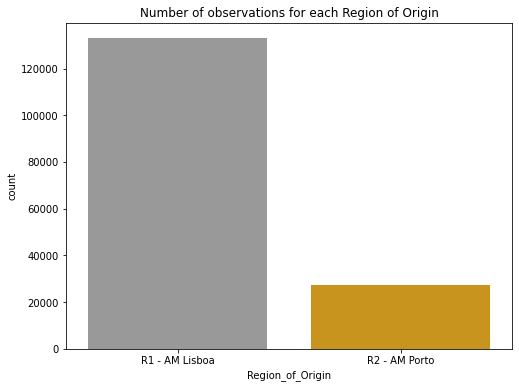

In [ ]:
countplot(df, 
          'Region_of_Origin',
          "Number of observations for each Region of Origin")

### What is number of observations for eacg Districts of Origin?

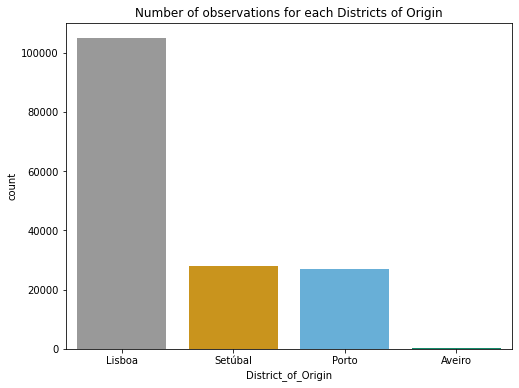

In [ ]:
countplot(df, 
          'District_of_Origin',
          "Number of observations for each Districts of Origin")

### What is number of observations for each County of Origin?

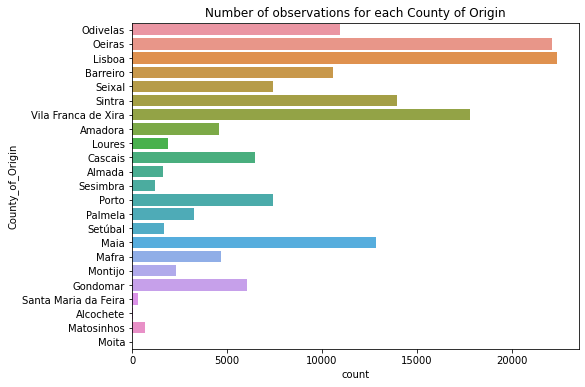

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, y='County_of_Origin')
plt.title("Number of observations for each County of Origin")
plt.ioff()

### What is the average Daily travel for each Region of Origin?

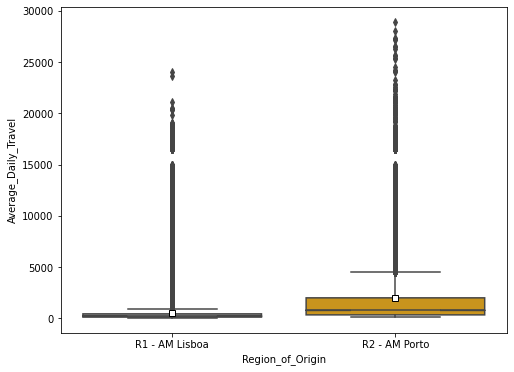

In [ ]:
boxplot(df, 'Region_of_Origin', 'Average_Daily_Travel')

### What is the average Daily travel for each Districts of Origin?

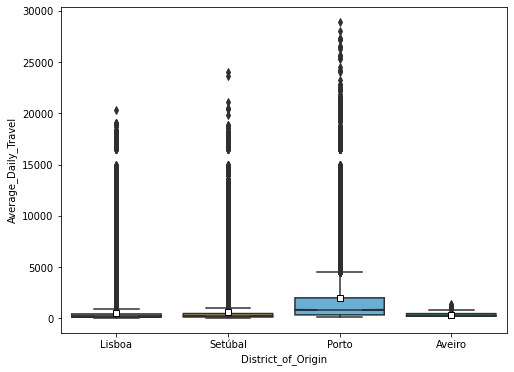

In [ ]:
boxplot(df, 'District_of_Origin', 'Average_Daily_Travel')

### What is the average number of users by County of Origin?

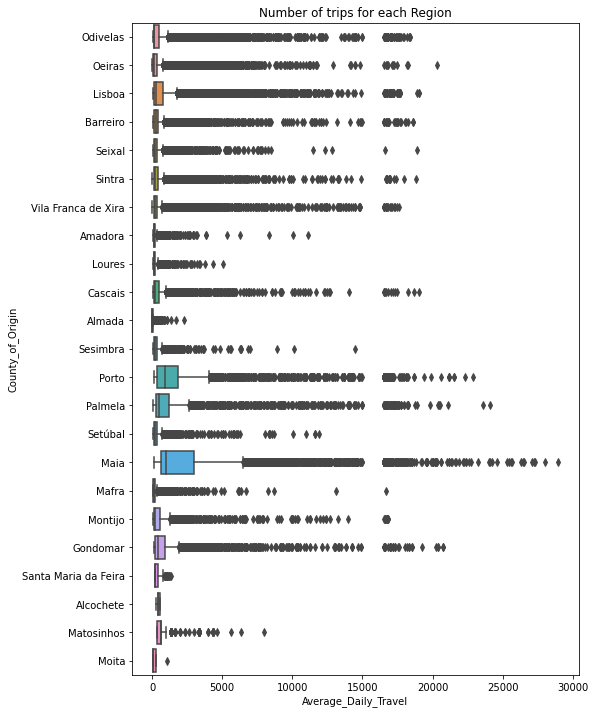

In [ ]:
f, ax = plt.subplots(figsize=(8, 12))
sns.boxplot(x='Average_Daily_Travel', y='County_of_Origin', data=df)
plt.title(title)
plt.ioff()

## Conclusions

### Key takeaways

Based on our exploratory analysis, the counties with the higher traffic are:
* Porto
* Palmela
* Maia

We can suppose that these counties are likely well covered by public transportation. If we wish to improve the infrastructure in public transit to adapt them to the senior population, these three counties would be a good choice for a pilot experiment. 


### Scalability and Impact
The code we present here is the first draft of a live reporting system that we could use to identify the travelling need of the senior population.
Analysing the private roads in the dataset could help identify the best portion were to develop public transportation. 




### Future Work
The graphs we present here could be integrated into a Streamlit application allowing the decision-makers to improve the public transportation system.
Using private datasets will help us to find detailed pattern of Senior Citizens travelling. By Applying Machine Learning models to the dataset will help us to find users those who frequently take same route for travelling.